In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from scipy import sparse
from scipy.sparse import csr_matrix

from sklearn.linear_model import  LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import metrics

import matplotlib.pyplot as plt 

## TODO:-
1. fetch splitted data 
2. train n models
3. get accuracy pointers
    - accuracy
    - precision
    - fscore
    - recall  
    --- done till here----
    - roc curve - look it up ?


## Load Data

In [2]:
path = r'BOW'
files = os.listdir(path)
files.remove('.ipynb_checkpoints')
print(files)
pos_data = []
np.allow_pickle = True

for i in range(len(files)-1):
    f = os.path.join(path, files[i])
    #d = np.load(f, allow_pickle=True)
    d = sparse.load_npz(f)#, allow_pickle=True)
    pos_data.append(d)
    print(f, d.shape)
    
f = os.path.join(path, files[0])
neg = sparse.load_npz(f)
print(f, neg.shape)
print(len(pos_data))
#neg_data = 
#sparse_matrix = scipy.sparse.load_npz('/tmp/sparse_matrix.npz')

['BOW_NEG.npz', 'BOW_POS0.npz', 'BOW_POS1.npz', 'BOW_POS2.npz', 'BOW_POS3.npz', 'BOW_POS4.npz', 'BOW_POS5.npz']
BOW\BOW_NEG.npz (337809, 122124)
BOW\BOW_POS0.npz (56301, 122124)
BOW\BOW_POS1.npz (56301, 122124)
BOW\BOW_POS2.npz (56301, 122124)
BOW\BOW_POS3.npz (56301, 122124)
BOW\BOW_POS4.npz (56301, 122124)
BOW\BOW_NEG.npz (337809, 122124)
6


## Trainning n models

In [ ]:
def gen_nbc_model(X_train, y_train):
    MNBclf = MultinomialNB()
    MNBclf.fit(X_train, y_train)
    print('.')
    return MNBclf

def gen_svm_model(X_train, y_train):
    SVMclf = svm.SVC(kernel='linear',verbose=1) # Linear Kernel
    SVMclf.fit(X_train, y_train)
    print('*')
    return SVMclf

def logistic_regression(X_train, y_train):
    logreg = LogisticRegression(max_iter=100)
    logreg.fit(X_train,y_train)
    return logreg

In [34]:
def evaluate_metrics(model_name,models,X_test, y_test):
    df = pd.DataFrame(columns=['Model no', 'Accuracy', 'Precision', 'f1 score', 'Recall'])
    print('Scores for : '+model_name)
    for i, model in enumerate(models):
        y_pred  =  model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        prescision = metrics.precision_score(y_test, y_pred)
        f1 = metrics.f1_score(y_test, y_pred)
        recall = metrics.recall_score(y_test, y_pred)
        
        #data  = {'Accuracy':accuracy, 'Precision':prescision, 'f1 score':f1, 'Recall':recall}
        #df = pd.DataFrame(data)
        model_label = model_name+"-"+str(i)
        df.loc[len(df.index)] = [model_label, accuracy,prescision,f1,recall]
    #plt.plot(y = df['Accuracy'], x = range(6))
    df.plot(ylim=(0,1), style='.-', figsize=[10,3])
    a = df['Accuracy'].mean()
    b = df['Precision'].mean()
    c = df['f1 score'].mean()
    d = df['Recall'].mean()
    df.loc[len(df.index)] = ['Avg', accuracy,prescision,f1,recall]
    
    print(df.head(10))

## Naive Bayes 

.
.
.
.
.
.
Scores for : BOW-NBC
    Model no  Accuracy  Precision  f1 score    Recall
0  BOW-NBC-0  0.512649   0.144855  0.223301  0.487078
1  BOW-NBC-1  0.786836   0.070294  0.050520  0.039428
2  BOW-NBC-2  0.786620   0.071317  0.051435  0.040222
3  BOW-NBC-3  0.802936   0.077357  0.047114  0.033871
4  BOW-NBC-4  0.805524   0.077477  0.045576  0.032284
5  BOW-NBC-5  0.818033   0.199640  0.122269  0.088119
6        Avg  0.818033   0.199640  0.122269  0.088119


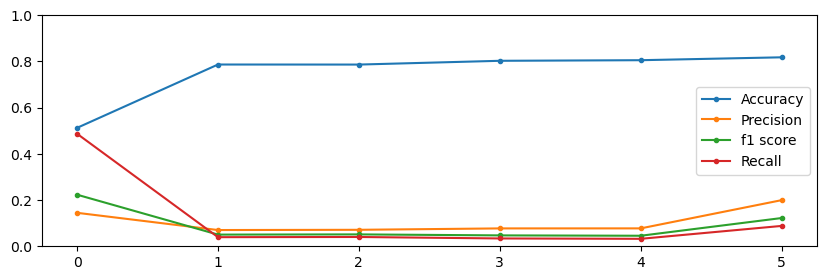

In [35]:
nbc_bow_models = []
#svm_bow_models = []

for i, pos in enumerate(pos_data):
    #print(i)
    pos_labels = np.ones(pos.shape[0])
    neg_labels = np.zeros(neg.shape[0])
    y = np.hstack((pos_labels, neg_labels))
    x = sparse.vstack((pos, neg))
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 50)
    
    model = gen_nbc_model(X_train, y_train)
    nbc_bow_models.append(model)
    
    #model = gen_svm_model(X_train, y_train)
    #svm_bow_models.append(model)

evaluate_metrics("BOW-NBC", nbc_bow_models, X_test, y_test)

#evaluate_metrics("BOW-SVM", svm_bow_models, X_test, y_test)

## Logic Regression Model

In [36]:
nbc_bow_models = []
#svm_bow_models = []

for i, pos in enumerate(pos_data):
    #print(i)
    pos_labels = np.ones(pos.shape[0])
    neg_labels = np.zeros(neg.shape[0])
    y = np.hstack((pos_labels, neg_labels))
    x = sparse.vstack((pos, neg))
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
    
    
    model = logistic_regression(X_train, y_train)
    nbc_bow_models.append(model)
    
    #model = gen_svm_model(X_train, y_train)
    #svm_bow_models.append(model)
evaluate_metrics("BOW-LR", nbc_bow_models, X_test, y_test)
#evaluate_metrics("BOW-SVM", svm_bow_models, X_test, y_test)

C:\Users\gyank\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KeyboardInterrupt: 